In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2.10.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 13260615436990576705534766874624.0000 - val_loss: 4316318818354486818994388992.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2280709246626288393084993536.0000 - val_loss: 1008990046101965251134095360.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 533142890384429854064902144.0000 - val_loss: 235863334800151373552812032.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 124628444241386686428217344.0000 - val_loss: 55135782344873713460051968.0000
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 29133293403746895348629504.0000 - val_loss: 12888619027542879995166720.0000
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 6810247375794405531189248.0000 - val_loss: 3012866645536695977508864.0000
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1591974766148

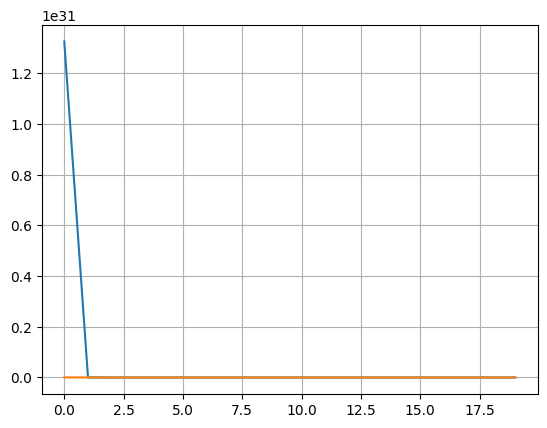

In [15]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


model_scaled = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model_scaled.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history_scaled = model_scaled.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test_scaled = model_scaled.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model_scaled.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 289981998301184.0000 - val_loss: 57750761472.0000
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 30515023872.0000 - val_loss: 13499879424.0000
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 7133236736.0000 - val_loss: 3155748608.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1667474944.0000 - val_loss: 737690240.0000
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 389791552.0000 - val_loss: 172443200.0000
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 91118400.0000 - val_loss: 40310284.0000
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 21299940.0000 - val_loss: 9422828.0000
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 4979103.0000 - val_loss: 2202622.0000
Epoch 9/20
363/363 [==============================] - 0s 1ms/step 

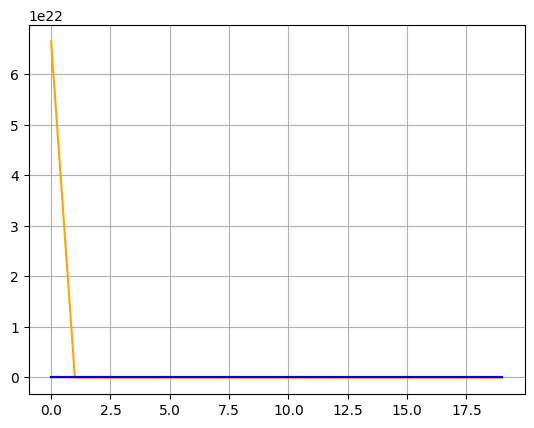

In [11]:
plt.plot(pd.DataFrame(history.history),label ="unscaled",color = 'orange')
plt.plot(pd.DataFrame(history_scaled.history), label="scaled", color='blue')
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane